## Импорт библиотек

In [ ]:
!pip install folium geopandas
!pip install mapclassify>=2.4.0

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
import mapclassify
import os

from shapely import geometry
from folium.plugins import MarkerCluster

# Добавление исходных данных

In [ ]:
from google.colab import files

# Загрузка файлов через диалоговое окно
uploaded = files.upload()



Saving border.geojson to border (1).geojson
Saving border.qmd to border (1).qmd
Saving cafe.geojson to cafe (1).geojson
Saving cafe.qmd to cafe (1).qmd
Saving cafeWGS.geojson to cafeWGS (1).geojson
Saving cafeWGS.qmd to cafeWGS (1).qmd
Saving hotels.geojson to hotels (1).geojson
Saving hotels.qmd to hotels (1).qmd
Saving museums.geojson to museums (1).geojson
Saving museums.qmd to museums (1).qmd
Saving okn_points.geojson to okn_points (1).geojson
Saving okn_points.qmd to okn_points (1).qmd


In [ ]:
# Проверка, что файлы загружены
!ls -l *.geojson

# Сохранение данных в переменные

data_cafe = gpd.read_file('cafeWGS.geojson')
data_hotels = gpd.read_file('./hotels.geojson')
data_museums = gpd.read_file('./museums.geojson')
data_okn_points = gpd.read_file('./okn_points.geojson')
data_border = gpd.read_file('border.geojson')

-rw-r--r-- 1 root root  18389 May 13 13:53 'border (1).geojson'
-rw-r--r-- 1 root root  18389 May 13 13:28  border.geojson
-rw-r--r-- 1 root root 288093 May 13 13:53 'cafe (1).geojson'
-rw-r--r-- 1 root root 288093 May 13 13:28  cafe.geojson
-rw-r--r-- 1 root root 282657 May 13 13:53 'cafeWGS (1).geojson'
-rw-r--r-- 1 root root 282657 May 13 13:28  cafeWGS.geojson
-rw-r--r-- 1 root root  16638 May 13 13:53 'hotels (1).geojson'
-rw-r--r-- 1 root root  16638 May 13 13:28  hotels.geojson
-rw-r--r-- 1 root root  60232 May 13 13:53 'museums (1).geojson'
-rw-r--r-- 1 root root  60232 May 13 13:28  museums.geojson
-rw-r--r-- 1 root root 283477 May 13 13:53 'okn_points (1).geojson'
-rw-r--r-- 1 root root 283477 May 13 13:28  okn_points.geojson


In [ ]:
#пересохранение в WGS 84
data_cafe=data_cafe.to_crs('EPSG:4326')
data_hotels=data_hotels.to_crs('EPSG:4326')
data_museums=data_museums.to_crs('EPSG:4326')
data_okn=data_okn_points.to_crs('EPSG:4326')
data_border=data_border.to_crs('EPSG:4326')

In [ ]:
#проверка crs
print(data_cafe.crs.name)
print(data_hotels.crs.name)
print(data_museums.crs.name)
print(data_okn.crs.name)
print(data_border.crs.name)

WGS 84
WGS 84
WGS 84
WGS 84
WGS 84


# Создание карты и несколько подложек

In [ ]:
# Создание карты
m = folium.Map(
    location=[data_border.centroid.y.mean(), data_border.centroid.x.mean()],
    zoom_start=12,
    tiles="cartodb positron",
    control_scale=True)


<ipython-input-117-82021c9705fe>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[data_border.centroid.y.mean(), data_border.centroid.x.mean()],


In [ ]:
# Создаем карту с пустым базовым слоем (чтобы основной слой не был активен)
m = folium.Map(
    location=[data_border.centroid.y.mean(), data_border.centroid.x.mean()],
    zoom_start=12,
    tiles=None,  # Убираем стандартный слой
    control_scale=True
)

# Добавляем подложки с overlay=False (базовые слои)
folium.TileLayer(
    tiles="cartodb positron",
    name='Базовая карта',
    overlay=False,  # Это фоновый слой
    control=True,   # Показывать в LayerControl
    show=True       # Сделать активным по умолчанию
).add_to(m)

folium.TileLayer(
    'OpenStreetMap.Mapnik',
    name='OSM',
    overlay=False,  # Это тоже фоновый слой
    control=True,
    show=False      # По умолчанию выключен
).add_to(m)

folium.TileLayer(
    'Esri.WorldImagery',
    name='Спутник',
    overlay=False,  # Фоновый слой
    control=True,
    show=False      # По умолчанию выключен
).add_to(m)


m

<ipython-input-187-a0d269f3f4f9>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[data_border.centroid.y.mean(), data_border.centroid.x.mean()],


# Добавление границы

In [ ]:
# Для всех столбцов с датами
for col in data_border.select_dtypes(include=['datetime64']).columns:
    data_border[col] = data_border[col].astype(str)
# Добавляем границы территории на карту
folium.GeoJson(
    data_border,
    name="Border",
    style_function=lambda x: {'fillColor': 'blue', 'color': 'indianred', 'weight': 2, 'fillOpacity': 0, 'dashArray': '5, 5'},
).add_to(m)

m

# Добавление знака севера

In [ ]:
from folium.plugins import FloatImage


url = (
    "https://raw.githubusercontent.com/ocefpaf/secoora_assets_map/"
    "a250729bbcf2ddd12f46912d36c33f7539131bec/secoora_icons/rose.png"
)

FloatImage(url, bottom=5, left=0.5, width='80px').add_to(m)

m

Добавление координат для мыши

In [ ]:
from folium.plugins import MousePosition

MousePosition().add_to(m)

m

Добавление возможности открыть карту во весь экран



И геокодер

In [ ]:
folium.plugins.Fullscreen(
    position="topright",
    title="Expand me",
    title_cancel="Exit me",
    force_separate_button=True,
).add_to(m)

folium.plugins.Geocoder(position='bottomright',add_marker=False).add_to(m)
# но есть одно но - остается плашка после поиска. не удалось решить этот вопрос
# может нам другой поиск нужен был?

m

# Музеи сетка

In [ ]:
#перепроицируем в нужную CRS
data_museums_37= data_museums.to_crs("EPSG:32637")
data_okn_points_37= data_okn_points.to_crs("EPSG:32637")
data_border_37=data_border.to_crs("EPSG:32637")


In [ ]:
#создаем сетку
minX, minY, maxX, maxY = data_border_37.total_bounds
cell_size = 300
grid_cells = []
x, y = (minX, minY)
geom_array = []

while y <= maxY:
        while x <= maxX:
            geom = geometry.Polygon([(x,y), (x, y+cell_size), (x+cell_size, y+cell_size), (x+cell_size, y), (x, y)])
            geom_array.append(geom)
            x += cell_size
        x = minX
        y += cell_size


fishnet = gpd.GeoDataFrame(geom_array, columns=['geometry']).set_crs('EPSG:32637')
fishnet['id'] = fishnet.index

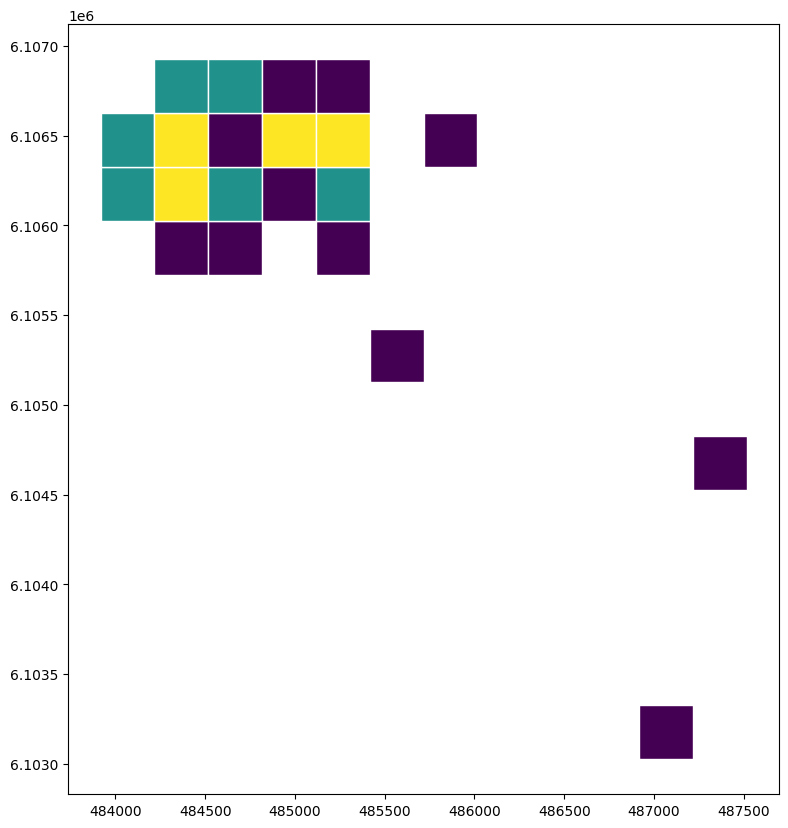

In [ ]:
#присоединяем к сетке кол-во попадающих в нее музеев
merged = gpd.sjoin(data_museums_37, fishnet, how='left', predicate='within')
merged['n'] = 1
dissolve = merged.dissolve(by="index_right", aggfunc="count")
fishnet.loc[dissolve.index, 'n'] = dissolve.n.values

ax = fishnet.plot(column='n', figsize=(16, 10), cmap='viridis', scheme='natural_breaks', k=3, edgecolor="white")


In [ ]:
#присоединяем сетку с данными к карте
folium.Choropleth(
    geo_data=fishnet,
    data=fishnet,
    columns=['id', 'n'],
    fill_color='YlGn',
    fill_opacity = 0.7,
    key_on='id',
    nan_fill_opacity=0,
   line_color = "#0000",
   legend_name="Распределение музеев",
   name='Распределение Музеев',
    show=False
).add_to(m)
m


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Создаем FeatureGroup с отключенным отображением по умолчанию
museum_group = folium.FeatureGroup(name="Музеи", show=False)
marker_cluster = MarkerCluster(
    options={
        'showCoverageOnHover': True,
        'zoomToBoundsOnClick': True
    }
).add_to(museum_group)

# Добавляем маркеры в кластер
for idx, row in data_museums.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        icon=folium.Icon(
            icon='building-columns',
            prefix='fa',
            color='gray',
            icon_color='white'
        ),
        popup=f"""<b>{row['Наименование']}</b><br>
        <b>{row['Адрес']}</b><br>
        Рейтинг: {row['Рейтинг']}""",
    ).add_to(marker_cluster)

# Добавляем FeatureGroup на карту
museum_group.add_to(m)


# Показываем карту
m


# Точки музеев

In [ ]:
# museum_layer = folium.FeatureGroup(name='Музеи', show=False).add_to(m)
#museum_layer = folium.FeatureGroup(show=False).add_to(m)

## ОКН тепловая карта

In [ ]:
from folium.plugins import HeatMap

In [ ]:
#создаем с помощью плагина тепловую карту расположения ОКН
heat_data = data_okn.geometry.apply(lambda geom: [geom.y, geom.x]).tolist() #Извлекаем координаты из DataGeoFrame

gradient = {str(k): v for k, v in {0.4: 'yellow', 0.6: 'orange', 1: 'red'}.items()} #заранее прописываем оформление heatmap
HeatMap(
    heat_data,
    name='распределение ОКН',
    radius=15,
    blur=20,
    max_zoom=13,
    gradient=gradient
).add_to(m)

m

In [ ]:
 #okn_layer = folium.FeatureGroup(show=False).add_to(m)

#Точки отелей

In [ ]:
# Создаем отдельную группу для отелей
hotels_layer = folium.FeatureGroup(name='Отели', show=False).add_to(m)
# это создано специально чтобы можно было его добавить в управление слоями
#и заведомо слой выключен, но потом его можно будет включить в редакторе слоев

for idx, row in data_hotels.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        icon=folium.Icon(
            icon='bed',         # Тип иконки
            prefix='fa',          # Font Awesome
            color='cadetblue',        # Цвет иконки
            icon_color='white'    # Цвет символа
        ),
        name="Отели",
        tooltip=row['Наименование'],
        popup=f"""<b>Адрес: {row['Адрес']}</b><br>
         {row['Описание']}<br>
        Рейтинг: {row['Рейтинг']}"""
    ).add_to(hotels_layer)  # Добавляем маркеры в группу, а не на карту напрямую


#{'darkred', 'pink', 'darkgreen', 'cadetblue', 'green', 'purple', 'gray', 'lightred', 'white', 'black', 'red', 'blue', 'lightblue', 'darkblue', 'orange', 'darkpurple', 'lightgray', 'beige', 'lightgreen'}.
m

# рестораны

In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
print(data_cafe.columns.tolist())  # Выведет список всех столбцов

['fid', 'Наименование', 'Описание', 'Рубрики', 'Адрес', 'Комментарий к адресу', 'Почтовый индекс', 'Микрорайон', 'Район', 'Город', 'Округ', 'Регион', 'Страна', 'Часы работы', 'Часовой пояс', 'Рейтинг', 'Количество отзывов', 'Телефон 1', 'Телефон 2', 'Телефон 3', 'E-mail', 'Веб-сайт 1', 'Веб-сайт 2', 'Twitter', 'ВКонтакте', 'WhatsApp 1', 'WhatsApp 2', 'Viber', 'Telegram', 'YouTube', '2GIS URL', 'Тип', 'открытие', 'закрытие', 'открытие_', 'закрытие_', 'Рубрика_2', 'Y', 'X', 'geometry']


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Инициализируем кластер
marker_cluster = MarkerCluster(
    name="Кафе и рестораны",
    options={
        'showCoverageOnHover': True,  # Показывать границы кластера при наведении
        'zoomToBoundsOnClick': True   # Приближать при клике на кластер
    }
).add_to(m)

# Добавляем маркеры в кластер
for idx, row in data_cafe.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        icon=folium.Icon(
            icon='utensils',
            prefix='fa',
            color='darkred',
            icon_color='white'
        ),
        popup=f"""<b>{row['Наименование']}</b><br>
        {row['Рубрика_2']}<br>
        <b>{row['Адрес']}</b><br>
        Рейтинг: {row['Рейтинг']}""",
    ).add_to(marker_cluster)

#{'darkred', 'pink', 'darkgreen', 'cadetblue', 'green', 'purple', 'gray', 'lightred', 'white', 'black', 'red', 'blue', 'lightblue', 'darkblue', 'orange', 'darkpurple', 'lightgray', 'beige', 'lightgreen'}.
m

#Контроль слоев
#В самом конце !!!

In [ ]:
# Добавляем контроль слоев (можно скрыть кластер)
folium.LayerControl(collapsed=False).add_to(m)

m